In [4]:
#This sets the directory from which we will pull our dataset

In [6]:
    #1)	If you were to train a model to classify the above digits, 
    #what class do you think it would be most likely to assign this one – 1. Explain your reasoning.

In [7]:
cd C:\Python

C:\Python


In [8]:
#Imports pandas and numpy for use later on
import pandas as pd
import numpy as np

#Imports our dataset from the CSV file Wind.CSV as "wind"
wind = pd.read_csv("Wind.csv")

In [9]:
import datetime #for use below

#Combines the values of year, month, day, hour, and minute to produce a single representative variable named "date"
wind['date'] = pd.to_datetime(wind[["Year", "Month", "Day", "Hour", "Minute"]])
wind.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Wind Direction,Relative Humidity,Temperature,Pressure,WindForce,date
0,1998,1,1,0,0,0,0,0,0,0,...,161.94,0,0.16,4.7,207.2,92.94,-1.0,910,Gentle Breeze,1998-01-01 00:00:00
1,1998,1,1,0,30,0,0,0,0,0,...,164.56,0,0.16,4.6,207.2,92.92,-1.0,910,Gentle Breeze,1998-01-01 00:30:00
2,1998,1,1,1,0,0,0,0,0,0,...,164.74,0,0.16,4.5,212.2,92.43,-1.0,910,Gentle Breeze,1998-01-01 01:00:00
3,1998,1,1,1,30,0,0,0,0,0,...,162.40,0,0.16,4.4,212.2,92.41,-1.0,910,Gentle Breeze,1998-01-01 01:30:00
4,1998,1,1,2,0,0,0,0,0,0,...,158.35,0,0.16,4.3,218.9,91.88,-1.0,910,Gentle Breeze,1998-01-01 02:00:00


In [10]:
#Lists out all variables, how many instances there are of each, and their data types
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385440 entries, 0 to 385439
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Year                385440 non-null  int64         
 1   Month               385440 non-null  int64         
 2   Day                 385440 non-null  int64         
 3   Hour                385440 non-null  int64         
 4   Minute              385440 non-null  int64         
 5   DHI                 385440 non-null  int64         
 6   DNI                 385440 non-null  int64         
 7   GHI                 385440 non-null  int64         
 8   Clearsky DHI        385440 non-null  int64         
 9   Clearsky DNI        385440 non-null  int64         
 10  Clearsky GHI        385440 non-null  int64         
 11  Cloud Type          385440 non-null  int64         
 12  Dew Point           385440 non-null  float64       
 13  Solar Zenith Angle  385440 no

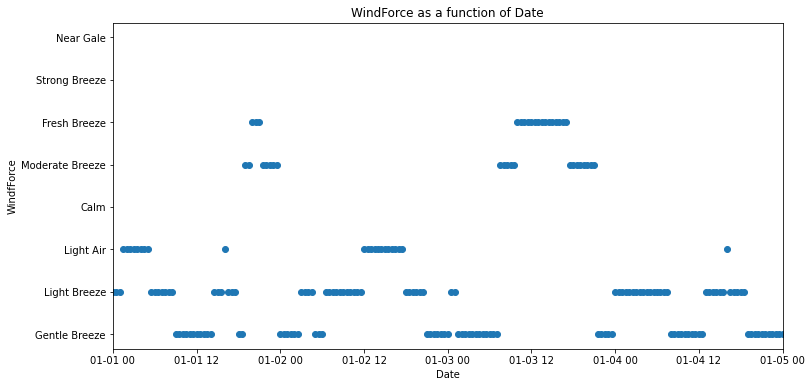

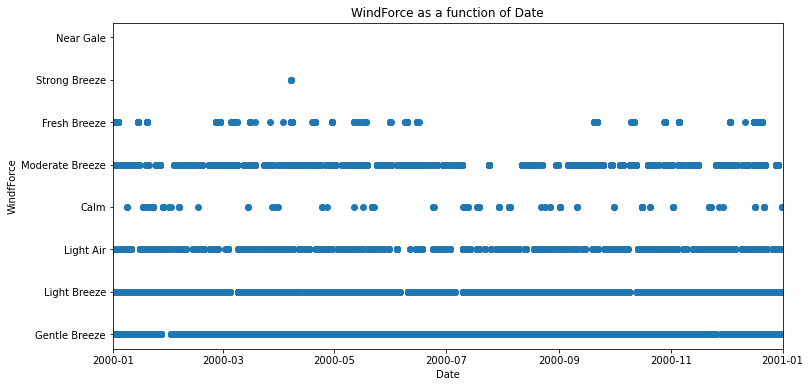

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt #for use below


#Creates a 12x6 plot of windforce as a function of the date
plt.figure(figsize=(12, 6))
plt.plot(wind['date'], wind['WindForce'], 'o')           # scatter plot showing actual data

plt.xlabel('Date')
plt.ylabel('WindfForce')
plt.title('WindForce as a function of Date')

#limits the x axis to the first five days of January of 2000
plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

plt.figure(figsize=(12, 6))
plt.plot(wind['date'], wind['WindForce'], 'o')           # scatter plot showing actual data

plt.xlabel('Date')
plt.ylabel('WindfForce')
plt.title('WindForce as a function of Date')

#Limits the x axis to 2000 - 2001
plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

In [13]:
    #2)	How would you go about converting a categorical variable to a numerical one? 
    #Describe how you might list out the windforce categories in your spreadsheet. 

In [14]:
#Defines windforce as wind_cat, look at first few lines
wind_cat = wind[["WindForce"]]
wind_cat.head(10)

,WindForce
0,Gentle Breeze
1,Gentle Breeze
2,Gentle Breeze
3,Gentle Breeze
4,Gentle Breeze
5,Gentle Breeze
6,Gentle Breeze
7,Gentle Breeze
8,Light Breeze
9,Light Breeze


In [15]:
#Import ordinal encoder and rename as encoder for ease of use
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

#When calling wind_cat_encoded we use the ordinal encoder to numerically encode the categorical variables
wind_cat_encoded = encoder.fit_transform(wind_cat)
wind['windcat'] = wind_cat_encoded

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt #for later use

from sklearn.model_selection import train_test_split

#Splits the data into a train and test set
train_set, test_set = train_test_split(wind, test_size=0.1, random_state=42)

In [17]:
corr_matrix = wind.corr()

In [18]:
#Creates a correlation matrix showing the correlation of each variable with windcat (our encoded version of windforce)
corr_matrix["windcat"].sort_values(ascending=False)

windcat               1.000000
Wind Direction        0.019450
GHI                   0.015169
DNI                   0.013125
Surface Albedo        0.013111
Clearsky GHI          0.012934
Clearsky DNI          0.012398
Pressure              0.012282
Hour                  0.011554
DHI                   0.008063
Year                  0.006950
Minute                0.004363
Clearsky DHI          0.004312
Fill Flag             0.001294
Day                   0.000316
Cloud Type           -0.002164
Solar Zenith Angle   -0.005312
Month                -0.005393
Relative Humidity    -0.007423
Temperature          -0.025759
Wind Speed           -0.026719
Dew Point            -0.036294
Name: windcat, dtype: float64

In [19]:
    #3)	Without rearranging our categories to correspond with figure 2, 
    #how do you think our model will perform at predicting categories? 

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

#Defines the numerical variables we intend to consider for training 
wind_num = wind.drop(["WindForce", "Wind Speed", "date", #"Minute", "Clearsky DHI", "Clearsky DNI", "Clearsky GHI"
                          #, "Year", "Day","GHI", "DHI", "DNI",
                      #"Hour", "Cloud Type", "Fill Flag", "Month", 
                      "windcat"
                         ], axis = 1)

#Fills in any blank values according to the imputer strategy defined above
imputer.fit(wind_num)

SimpleImputer()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Defines the imputer strategy and scaler method used to transform our numerical variables
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),('std_scaler',StandardScaler())
#        ('attribs_adder', CombinedAttributesAdder()),
    ])

In [22]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

#Defines numerical and categorical attributes 
num_attribs = list(wind_num)
cat_attribs = []

#Defines our full pipeline as the combination of the above numerical and categorical pipelines
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

#Calls pipeline to transform our train and test datasets according to the above specifications
wind_prepared = full_pipeline.fit_transform(train_set)
test_wind_prepared = full_pipeline.fit_transform(test_set)

In [23]:
from sklearn.tree import DecisionTreeClassifier

#Defines tree_reg as a decision tree classifier with the listed hyperparameters and calls it to make predictions on windcat

tree_reg = DecisionTreeClassifier(random_state=42,
                                 min_samples_split = 2,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 200)

tree_reg.fit(wind_prepared, train_set["windcat"])

DecisionTreeClassifier(max_depth=200, max_features='auto', random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error

#Train predictions RMSE
wind_predictions = tree_reg.predict(wind_prepared)
test_wind_predictions = tree_reg.predict(test_wind_prepared)
tree_mse = mean_squared_error(train_set["windcat"], wind_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [25]:
#And the test set RMSE
wind_predictions = tree_reg.predict(wind_prepared)
test_wind_predictions = tree_reg.predict(test_wind_prepared)
tree_mse = mean_squared_error(test_set["windcat"], test_wind_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.2935140914797902

In [26]:
#Imports various models for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


#Defines forest_reg as a randomforest classifier with the listedd parameters
forest_reg = RandomForestClassifier(
    n_estimators=200, 
    n_jobs = 8, 
    random_state=42, 
    max_depth= 150, 
    min_samples_leaf = 1, 
    min_samples_split = 2
)

#Calls forest_reg to fit the wind data making predictions on "windcat"
forest_reg.fit(wind_prepared, train_set["windcat"])

RandomForestClassifier(max_depth=150, n_estimators=200, n_jobs=8,
                       random_state=42)

In [27]:
#Train set predictions RMSE

wind_predictions = forest_reg.predict(wind_prepared)
test_wind_predictions = forest_reg.predict(test_wind_prepared)
forest_mse = mean_squared_error(train_set["windcat"], wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [29]:
#Test set predictions RMSE

forest_mse = mean_squared_error(test_set["windcat"], test_wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.965038493694937

In [30]:
#Creates a validation subset from the train set for use with a neural network
train_set, validation_set = train_test_split(train_set, test_size = 0.1, random_state = 42)

#Defines new test, train, and validation sets to call the pipeline to transform for the neural network (NN)
train_wind_prepared = full_pipeline.fit_transform(train_set)
test_wind_prepared = full_pipeline.fit_transform(test_set)
validation_wind_prepared = full_pipeline.fit_transform(validation_set)

In [31]:
#Imports Tensorflow and Keras for training a neural network
import tensorflow as tf

from tensorflow import keras
from sklearn.metrics import mean_squared_error

#Defines NN as the neural network with the listed parameters
NN = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(8, activation = "softmax")
])

#Compiles and runs the above neural network with the defined hyperparameters (!This may take a while to run)
NN.compile(loss = "sparse_categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001), metrics=["accuracy"])
history = NN.fit(train_wind_prepared, train_set["windcat"], epochs = 200, 
                 batch_size = 512,
                   validation_data = (validation_wind_prepared, validation_set["windcat"]))

Epoch 1/200
610/610 [==============================] - 3s 5ms/step - loss: 2.1158 - accuracy: 0.0021 - val_loss: 2.0955 - val_accuracy: 0.0118
Epoch 2/200
610/610 [==============================] - 3s 5ms/step - loss: 2.0798 - accuracy: 0.0726 - val_loss: 2.0652 - val_accuracy: 0.1589
Epoch 3/200
610/610 [==============================] - 3s 5ms/step - loss: 2.0524 - accuracy: 0.2489 - val_loss: 2.0398 - val_accuracy: 0.3154
Epoch 4/200
610/610 [==============================] - 3s 5ms/step - loss: 2.0277 - accuracy: 0.3441 - val_loss: 2.0159 - val_accuracy: 0.3580
Epoch 5/200
610/610 [==============================] - 3s 5ms/step - loss: 2.0045 - accuracy: 0.3619 - val_loss: 1.9934 - val_accuracy: 0.3615
Epoch 6/200
610/610 [==============================] - 3s 5ms/step - loss: 1.9825 - accuracy: 0.3622 - val_loss: 1.9721 - val_accuracy: 0.3595
Epoch 7/200
610/610 [==============================] - 3s 5ms/step - loss: 1.9616 - accuracy: 0.3613 - val_loss: 1.9515 - val_accuracy: 0.3590

Epoch 58/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4190 - accuracy: 0.3992 - val_loss: 1.4217 - val_accuracy: 0.3954
Epoch 59/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4173 - accuracy: 0.3993 - val_loss: 1.4200 - val_accuracy: 0.3958
Epoch 60/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4156 - accuracy: 0.3994 - val_loss: 1.4184 - val_accuracy: 0.3956
Epoch 61/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4140 - accuracy: 0.3995 - val_loss: 1.4169 - val_accuracy: 0.3958
Epoch 62/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4125 - accuracy: 0.3995 - val_loss: 1.4154 - val_accuracy: 0.3958
Epoch 63/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4111 - accuracy: 0.3996 - val_loss: 1.4140 - val_accuracy: 0.3961
Epoch 64/200
610/610 [==============================] - 3s 5ms/step - loss: 1.4098 - accuracy: 0.3998 - val_loss: 1.4127 - val_accuracy:

Epoch 115/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3772 - accuracy: 0.4042 - val_loss: 1.3799 - val_accuracy: 0.4005
Epoch 116/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3768 - accuracy: 0.4043 - val_loss: 1.3795 - val_accuracy: 0.4006
Epoch 117/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3765 - accuracy: 0.4045 - val_loss: 1.3792 - val_accuracy: 0.4007
Epoch 118/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3761 - accuracy: 0.4043 - val_loss: 1.3788 - val_accuracy: 0.4010
Epoch 119/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3757 - accuracy: 0.4045 - val_loss: 1.3784 - val_accuracy: 0.4012
Epoch 120/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3753 - accuracy: 0.4046 - val_loss: 1.3780 - val_accuracy: 0.4010
Epoch 121/200
610/610 [==============================] - 3s 5ms/step - loss: 1.3750 - accuracy: 0.4046 - val_loss: 1.3776 - val_ac

In [32]:
#Train set predictions accuracy
NN.evaluate(train_wind_prepared, train_set["windcat"])

9757/9757 [==============================] - 7s 682us/step - loss: 1.3516 - accuracy: 0.4103


[1.3516491651535034, 0.4103028178215027]

In [33]:
#Test set prediction accuracy
NN.evaluate(test_wind_prepared, test_set["windcat"])

1205/1205 [==============================] - 1s 688us/step - loss: 1.3540 - accuracy: 0.4091


[1.3539539575576782, 0.40909090638160706]

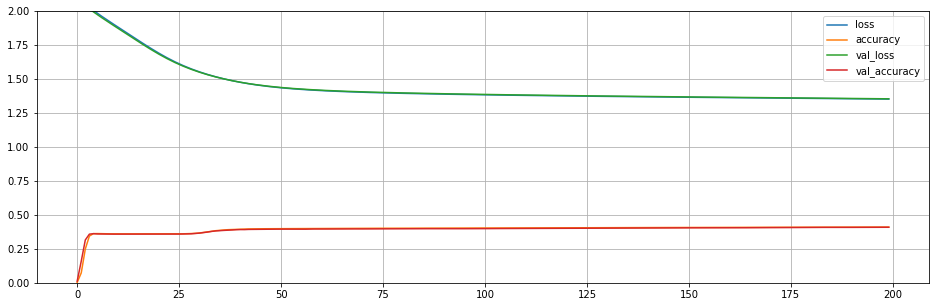

In [34]:
pd.DataFrame(history.history).plot(figsize=(16,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [37]:
        #4)	There’s a substantial difference between the RMSE for train and test predictions in the decision tree model. 
        #What do you think that indicates about the relationship between the model and the data? 
        #Why would the train RMSE be so much lower? 

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

## Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
## Number of features to consider at every split
max_features = ['auto', 'sqrt']
## Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, num = 11)]
max_depth.append(None)
## Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 200, num = 10)]
## Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
## Method of selecting samples for training each tree
bootstrap = [True, False]
## Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 109, 208, 307, 406, 505, 604, 703, 802, 901, 1000, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20],
 'min_samples_split': [2, 24, 46, 68, 90, 112, 134, 156, 178, 200]}


In [39]:
#Using the above random grid this will search for the optimal configuration of hyperparameters 
#(!This will take a long time to run)
random_trees = RandomizedSearchCV(estimator = forest_reg, param_distributions = random_grid, n_iter = 300, cv = 3, verbose=1, random_state=42, n_jobs = 4)
random_trees.fit(train_wind_prepared, train_set["windcat"])

Fitting 3 folds for each of 300 candidates, totalling 900 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=150,
                                                    n_estimators=200, n_jobs=8,
                                                    random_state=42),
                   n_iter=300, n_jobs=4,
                   param_distributions={'max_depth': [10, 109, 208, 307, 406,
                                                      505, 604, 703, 802, 901,
                                                      1000, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 20],
                                        'min_samples_split': [2, 24, 46, 68, 90,
                                                              112, 134, 156,
                                                              178, 200]},
                   random_sta

In [40]:
#Prints the optimal parameters found using gridsearch.
random_trees.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 406}

In [41]:
forest_reg.feature_importances_

array([0.07131818, 0.04096877, 0.08670834, 0.04187196, 0.00941857,
       0.02831532, 0.02628383, 0.02534669, 0.03134171, 0.02855858,
       0.02539856, 0.03015175, 0.0716848 , 0.07233402, 0.00556202,
       0.07610629, 0.13368792, 0.09126404, 0.07055106, 0.03312759])

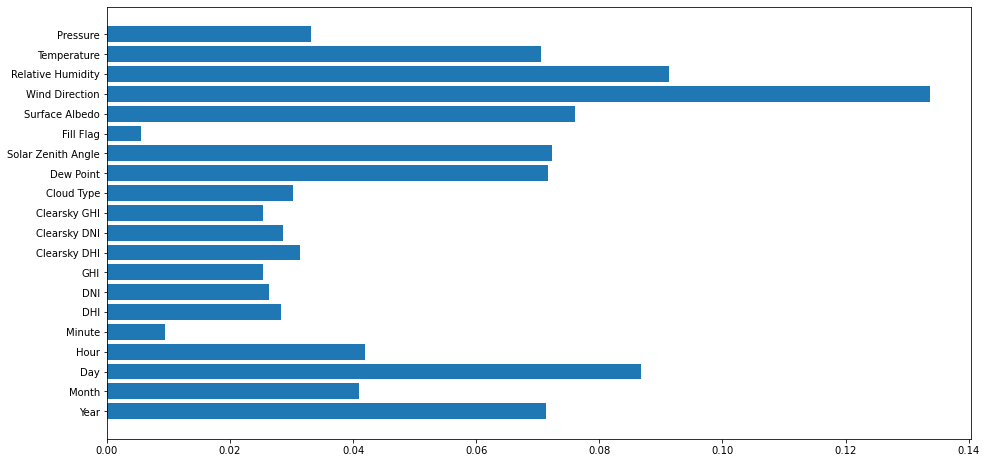

In [42]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])

ax.barh(num_attribs, forest_reg.feature_importances_)
plt.show()

In [43]:
#Imports pandas and numpy for use later on
import pandas as pd
import numpy as np

#Imports our dataset from the CSV file Wind.CSV as "wind"
wind = pd.read_csv("Wind.csv")

In [44]:
import datetime #for use below

#Combines the values of year, month, day, hour, and minute to produce a single representative variable named "date"
wind['date'] = pd.to_datetime(wind[["Year", "Month", "Day", "Hour", "Minute"]])
wind.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Wind Direction,Relative Humidity,Temperature,Pressure,WindForce,date
0,1998,1,1,0,0,0,0,0,0,0,...,161.94,0,0.16,4.7,207.2,92.94,-1.0,910,Gentle Breeze,1998-01-01 00:00:00
1,1998,1,1,0,30,0,0,0,0,0,...,164.56,0,0.16,4.6,207.2,92.92,-1.0,910,Gentle Breeze,1998-01-01 00:30:00
2,1998,1,1,1,0,0,0,0,0,0,...,164.74,0,0.16,4.5,212.2,92.43,-1.0,910,Gentle Breeze,1998-01-01 01:00:00
3,1998,1,1,1,30,0,0,0,0,0,...,162.40,0,0.16,4.4,212.2,92.41,-1.0,910,Gentle Breeze,1998-01-01 01:30:00
4,1998,1,1,2,0,0,0,0,0,0,...,158.35,0,0.16,4.3,218.9,91.88,-1.0,910,Gentle Breeze,1998-01-01 02:00:00


In [45]:
#Defines windforce as wind_cat, look at first few lines
wind_cat = wind[["WindForce"]]
wind_cat.head(10)

,WindForce
0,Gentle Breeze
1,Gentle Breeze
2,Gentle Breeze
3,Gentle Breeze
4,Gentle Breeze
5,Gentle Breeze
6,Gentle Breeze
7,Gentle Breeze
8,Light Breeze
9,Light Breeze


In [46]:
#Import ordinal encoder and rename as encoder for ease of use
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

#When calling wind_cat_encoded we use the ordinal encoder to numerically encode the categorical variables
wind_cat_encoded = encoder.fit_transform(wind_cat)
wind['windcat'] = wind_cat_encoded

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt #for later use

from sklearn.model_selection import train_test_split

#Splits the data into a train and test set
train_set, test_set = train_test_split(wind, test_size=0.1, random_state=42)

In [48]:
imputer = SimpleImputer(strategy="mean")

wind_num = wind.drop(["WindForce", "Wind Speed", "date", "Minute", #"Clearsky DHI", "Clearsky DNI", "Clearsky GHI"
                          #, "Year", "Day","GHI", "DHI", "DNI", "Hour", "Cloud Type", "Month",
                        "Fill Flag", "windcat"
                         ], axis = 1)

imputer.fit(wind_num)

SimpleImputer()

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Defines the imputer strategy and scaler method used to transform our numerical variables
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),('std_scaler',StandardScaler())
#        ('attribs_adder', CombinedAttributesAdder()),
    ])

In [50]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

#Defines numerical and categorical attributes 
num_attribs = list(wind_num)
cat_attribs = []

#Defines our full pipeline as the combination of the above numerical and categorical pipelines
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

#Calls pipeline to transform our train and test datasets according to the above specifications
wind_prepared = full_pipeline.fit_transform(train_set)
test_wind_prepared = full_pipeline.fit_transform(test_set)

In [51]:
#Imports random forest model for training
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

#Defines forest_reg as a randomforest classifier with the listed parameters
forest_reg = RandomForestClassifier(
    n_estimators=200, 
    n_jobs = 8, 
    random_state=42, 
    max_depth= 406, 
    min_samples_leaf = 1, 
    min_samples_split = 2
)

#Calls forest_reg to fit the wind data making predictions on "DHI" - We'll keep using train_wind_prepared from the NN
forest_reg.fit(wind_prepared, train_set["windcat"])

RandomForestClassifier(max_depth=406, n_estimators=200, n_jobs=8,
                       random_state=42)

In [52]:
#Train set predictions RMSE

wind_predictions = forest_reg.predict(wind_prepared)
test_wind_predictions = forest_reg.predict(test_wind_prepared)
forest_mse = mean_squared_error(train_set["windcat"], wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [53]:
#Test set predictions RMSE

forest_mse = mean_squared_error(test_set["windcat"], test_wind_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.9432859025226037

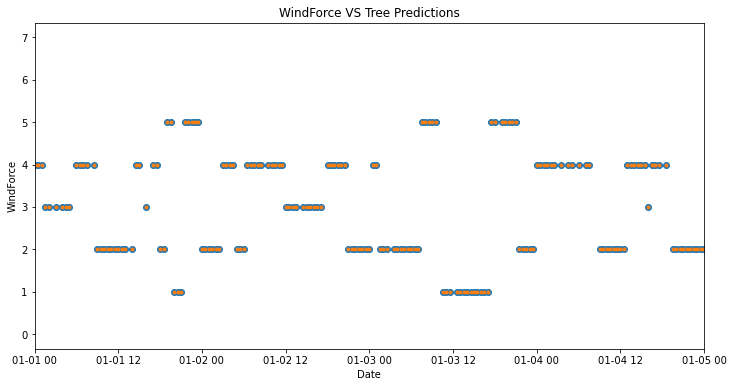

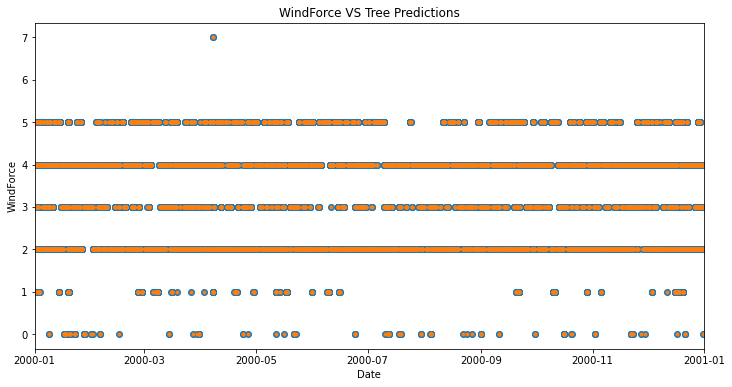

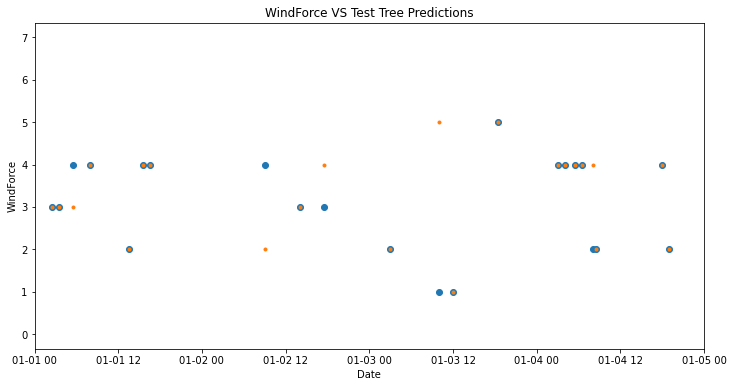

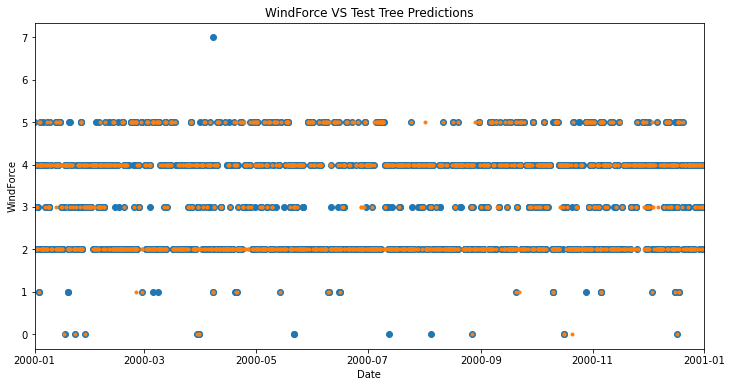

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['windcat'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], wind_predictions, '.')   # regression line
plt.xlabel('Date')
plt.ylabel('WindForce')
plt.title('WindForce VS Tree Predictions')

plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()


plt.figure(figsize=(12, 6))
plt.plot(train_set['date'], train_set['windcat'], 'o')           # scatter plot showing actual data
plt.plot(train_set['date'], wind_predictions, '.')   # regression line
plt.xlabel('Date')
plt.ylabel('WindForce')
plt.title('WindForce VS Tree Predictions')

plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['windcat'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, '.')   # regression line
plt.xlabel('Date')
plt.ylabel('WindForce')
plt.title('WindForce VS Test Tree Predictions')

plt.xlim([datetime.date(2000,1,1), datetime.date(2000,1,5)])

plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_set['date'], test_set['windcat'], 'o')           # scatter plot showing actual data
plt.plot(test_set['date'], test_wind_predictions, '.')   # regression line
plt.xlabel('Date')
plt.ylabel('WindForce')
plt.title('WindForce VS Test Tree Predictions')

plt.xlim([datetime.date(2000,1,1), datetime.date(2001,1,1)])

plt.show()

In [55]:
forest_reg.feature_importances_

array([0.072994  , 0.04169885, 0.08879764, 0.04265654, 0.02765381,
       0.02633131, 0.02521294, 0.03277101, 0.0287969 , 0.02548598,
       0.03032806, 0.0721868 , 0.07339037, 0.07826442, 0.13650203,
       0.09301847, 0.07141129, 0.03249959])

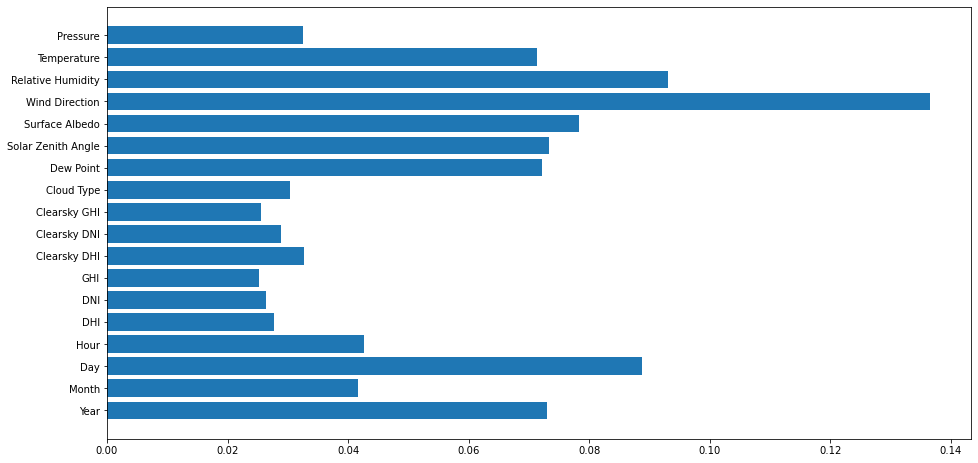

In [56]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])

ax.barh(num_attribs, forest_reg.feature_importances_)
plt.show()

In [57]:
    #5)	Choose one of the variables that was removed and explain 
    #why you think it was unnecessary when estimating windforce.